# Programming Assignment: Forward Euler for the Diffusion Equation

**Problem:**

Solve the diffusion equation

$$
u_t = u_{xx}, \quad 0 \le x \le 1, \quad t \ge 0
$$

with

- Initial condition:
$$
u(x,0) = \sin\left(\frac{\pi x}{2}\right) + \frac{1}{2} \sin(2 \pi x)
$$

- Boundary conditions:

$$
u(0,t) = 0, \quad u(1,t) = e^{-\pi^2 t / 4}, \quad t \ge 0
$$

- Using Forward Euler finite difference method with 
$$
\mu = \frac{\Delta t}{\Delta x^2} = 0.5 \text{ and } 0.509
$$

---

## Python Implementation


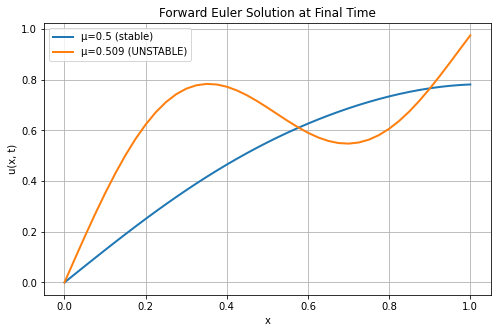

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------
# Parameters
# ---------------------------------------------------
Nx = 41                     # number of spatial points
x = np.linspace(0, 1, Nx)
dx = x[1] - x[0]

mu_values = [0.5, 0.509]    # two μ values
t_max_stable = 0.1
t_max_unstable = 0.01       # short time for unstable case

# Initial and boundary conditions
def initial_condition(x):
    return np.sin(0.5*np.pi*x) + 0.5*np.sin(2*np.pi*x)

def boundary_condition_right(t):
    return np.exp(-np.pi**2 * t / 4)

# ---------------------------------------------------
# Forward Euler solver
# ---------------------------------------------------
def forward_euler(mu, t_max):
    dt = mu * dx**2
    Nt = int(t_max/dt) + 1
    t = np.linspace(0, Nt*dt, Nt)
    
    u = np.zeros((Nt, Nx))
    u[0, :] = initial_condition(x)
    
    for n in range(Nt-1):
        u[n+1, 1:-1] = u[n, 1:-1] + mu*(u[n, 2:] - 2*u[n, 1:-1] + u[n, 0:-2])
        # Boundary conditions
        u[n+1, 0] = 0
        u[n+1, -1] = boundary_condition_right(t[n+1])
    
    return x, u[-1, :]

# ---------------------------------------------------
# Run simulations and plot
# ---------------------------------------------------
plt.figure(figsize=(8,5))

for mu in mu_values:
    is_stable = (mu <= 0.5)
    t_max = t_max_stable if is_stable else t_max_unstable
    x, u_final = forward_euler(mu, t_max)
    label = f'μ={mu} {"(stable)" if is_stable else "(UNSTABLE)"}'
    plt.plot(x, u_final, label=label, linewidth=2)

plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.title('Forward Euler Solution at Final Time')
plt.legend()
plt.grid(True)
plt.show()
